<a href="https://colab.research.google.com/github/sahilll05/PRODIGY_ML_01/blob/main/PRODIGY_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
house_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
print(len(house_data))
print(len(house_data.columns))
house_data.head()

1460
81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
house_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
columns_null = house_data.columns[house_data.isnull().any()]

for col in columns_null:
    print(col)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [ ]:
missing_values = house_data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print("\nColumns with Missing Values:")
print(columns_with_missing_values)


Columns with Missing Values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
# Check for duplicate rows
duplicates = house_data.duplicated().sum()

# Remove duplicate rows
house_data.drop_duplicates(inplace=True)

# Check for duplicate rows after removal
duplicates_after = house_data.duplicated().sum()
print(duplicates_after)

0


In [ ]:

# Get the column names and data types
column_info = house_data.dtypes

# Display column names and data types horizontally
for col_name, data_type in column_info.items():  # Use items() instead of iteritems()
    print(f"{col_name}: {data_type}\t", end='')

Id: int64	MSSubClass: int64	MSZoning: object	LotFrontage: float64	LotArea: int64	Street: object	Alley: object	LotShape: object	LandContour: object	Utilities: object	LotConfig: object	LandSlope: object	Neighborhood: object	Condition1: object	Condition2: object	BldgType: object	HouseStyle: object	OverallQual: int64	OverallCond: int64	YearBuilt: int64	YearRemodAdd: int64	RoofStyle: object	RoofMatl: object	Exterior1st: object	Exterior2nd: object	MasVnrType: object	MasVnrArea: float64	ExterQual: object	ExterCond: object	Foundation: object	BsmtQual: object	BsmtCond: object	BsmtExposure: object	BsmtFinType1: object	BsmtFinSF1: int64	BsmtFinType2: object	BsmtFinSF2: int64	BsmtUnfSF: int64	TotalBsmtSF: int64	Heating: object	HeatingQC: object	CentralAir: object	Electrical: object	1stFlrSF: int64	2ndFlrSF: int64	LowQualFinSF: int64	GrLivArea: int64	BsmtFullBath: int64	BsmtHalfBath: int64	FullBath: int64	HalfBath: int64	BedroomAbvGr: int64	KitchenAbvGr: int64	KitchenQual: object	TotRmsAbvGrd: int6

In [ ]:
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
fig = px.scatter_3d(house_data,x = 'LotArea', y='LotFrontage',z = 'SalePrice')
fig.show()

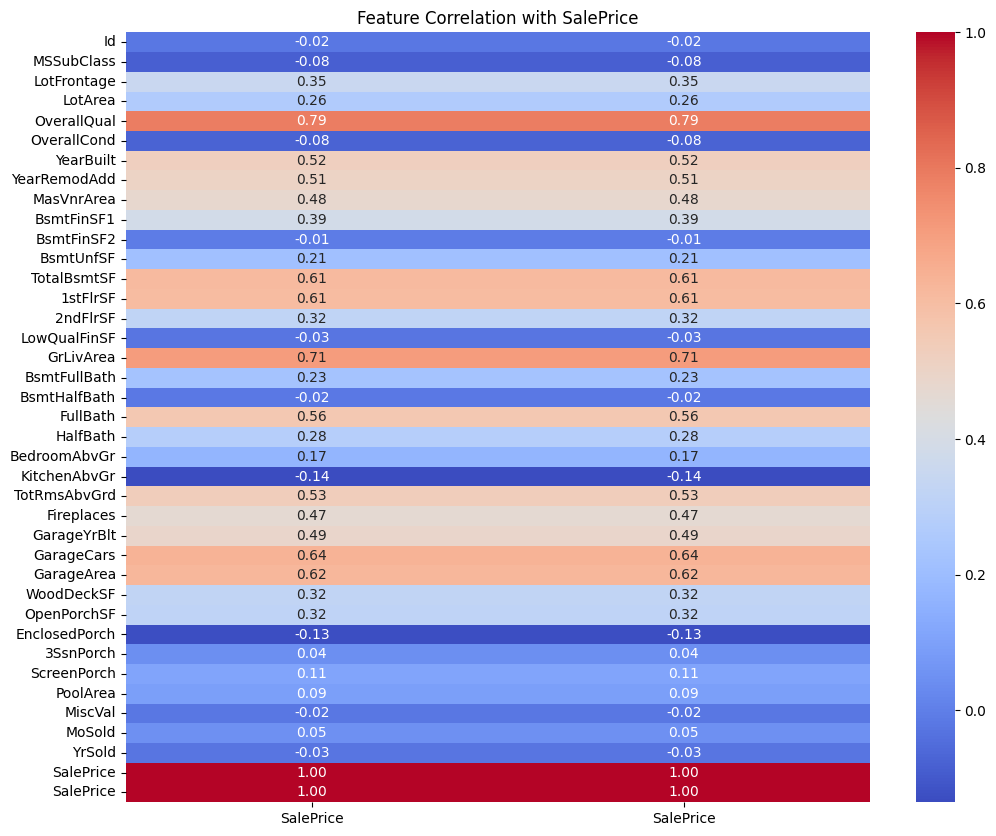

In [ ]:

#  list of categorical columns to exclude
categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# Select numerical columns
numerical_columns = [col for col in house_data.columns if col not in categorical_columns]

# Create a DataFrame with only numerical features and the target variable
numerical_data = house_data[numerical_columns + ['SalePrice']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Step 2: Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['SalePrice']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with SalePrice")
plt.show()

In [ ]:
# Split the data into training and testing sets
X = house_data[['TotalBsmtSF', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath',"FullBath", "HalfBath"]]
y = house_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

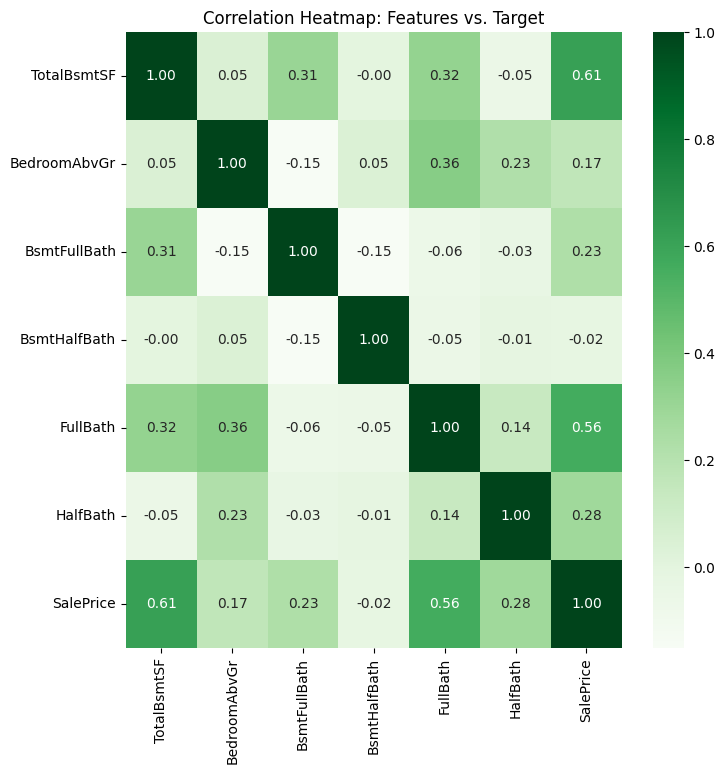

In [ ]:
# Select the columns of interest (features and target)
features = house_data[['TotalBsmtSF', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']]
target = house_data[['SalePrice']]

# Create a new DataFrame with only the selected columns
data_subset = pd.concat([features, target], axis=1)  # Use square brackets and specify axis=1

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title("Correlation Heatmap: Features vs. Target")
plt.show()

In [ ]:
# Check for missing values in the training dataset
missing_train = house_data.isnull().sum()
print("missing train data",missing_train)

# Check for missing values in the testing dataset
missing_test = test_data.isnull().sum()
print("missing test data",missing_test)

missing train data Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
missing test data Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [ ]:
# Missing values in selected features
features_missing_values = X.isnull().sum()
features_missing_values

TotalBsmtSF     0
BedroomAbvGr    0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
dtype: int64

In [ ]:
#create a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
print(model)

LinearRegression()


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2693215363.50
R-squared: 0.65


In [ ]:
X.sample(5)

,TotalBsmtSF,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
454,1728,4,2,0,2,0
1319,864,3,0,0,1,0
769,1650,4,1,0,3,1
1258,856,2,1,0,2,0
1228,1702,1,1,0,1,1


In [ ]:
# Predict the price of a new house
new_house = np.array([[3000, 4, 2,1,1,2]])
predicted_price = model.predict(new_house)
print(f"Predicted Price for the New House: ${predicted_price[0]:.2f}")

Predicted Price for the New House: $394809.41


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
# Cross-validation to assess model performance
cv_scores = cross_val_score(model, X, y, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', cv_scores.mean())

Cross-Validation Scores: [0.60009438 0.65556307 0.63763301 0.61946238 0.44203474]
Mean CV Score: 0.5909575152454488


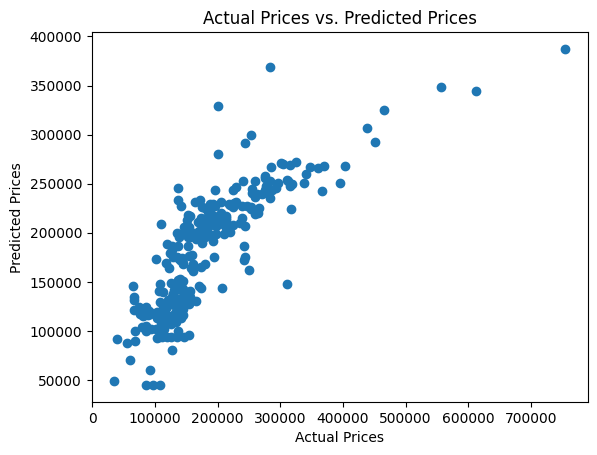

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()